In [ ]:
## HODRICK- PRESCOTT

In [1]:
from LecturaDatos import read_data

In [2]:
df_clean= read_data()

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats


📊 ANÁLISIS HODRICK-PRESCOTT CON PRUEBAS ESTADÍSTICAS

🔧 Aplicando Filtro Hodrick-Prescott (λ=14400)...
✅ Filtro HP aplicado correctamente
   Observaciones: 202

📈 ESTADÍSTICAS DESCRIPTIVAS
----------------------------------------------------------------------

Serie Original:
  Media:             37888.67
  Desv. Est.:        18061.74
  Mínimo:             7034.00
  Máximo:            88139.00

Tendencia HP:
  Media:             37888.67
  Desv. Est.:        14160.23
  Mínimo:            15690.38
  Máximo:            66799.87

Ciclo HP:
  Media:                 0.00
  Desv. Est.:        11117.08
  Mínimo:           -36651.17
  Máximo:            34988.48

🧪 PRUEBAS DE NORMALIDAD

----------------------------------------------------------------------
📊 SERIE ORIGINAL
----------------------------------------------------------------------

1. Test de Jarque-Bera:
   Estadístico JB:    14.2198
   p-valor:          0.000817
   ⚠️  Distribución NO normal (p ≤ 0.05)

2. Test de Shapiro-Wilk:

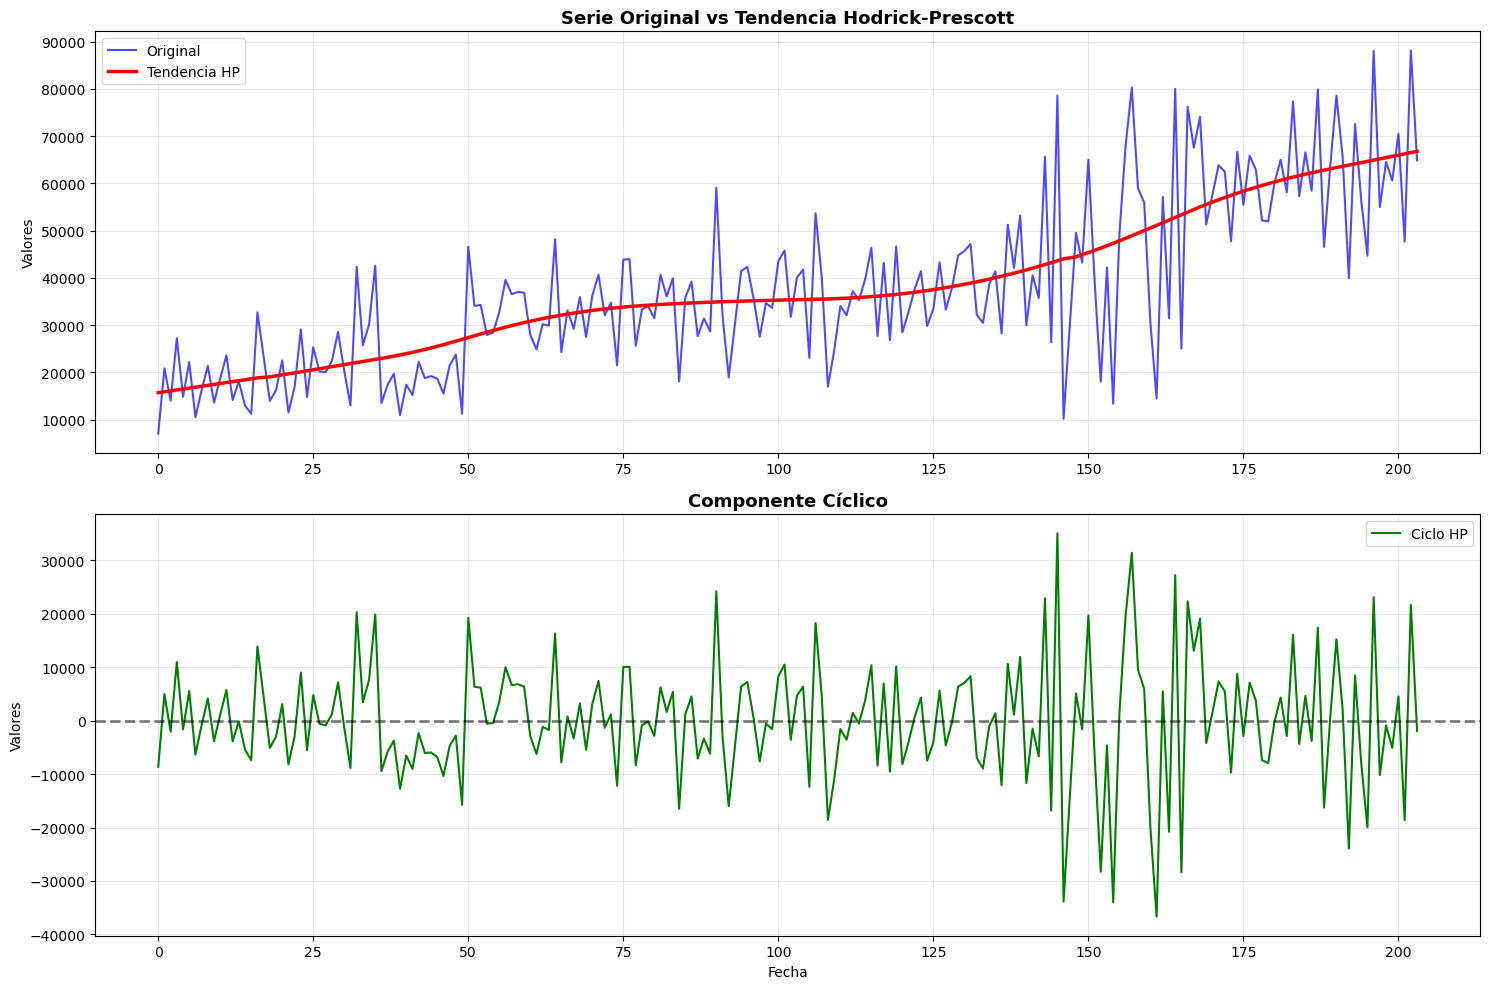

✅ Gráfico principal generado


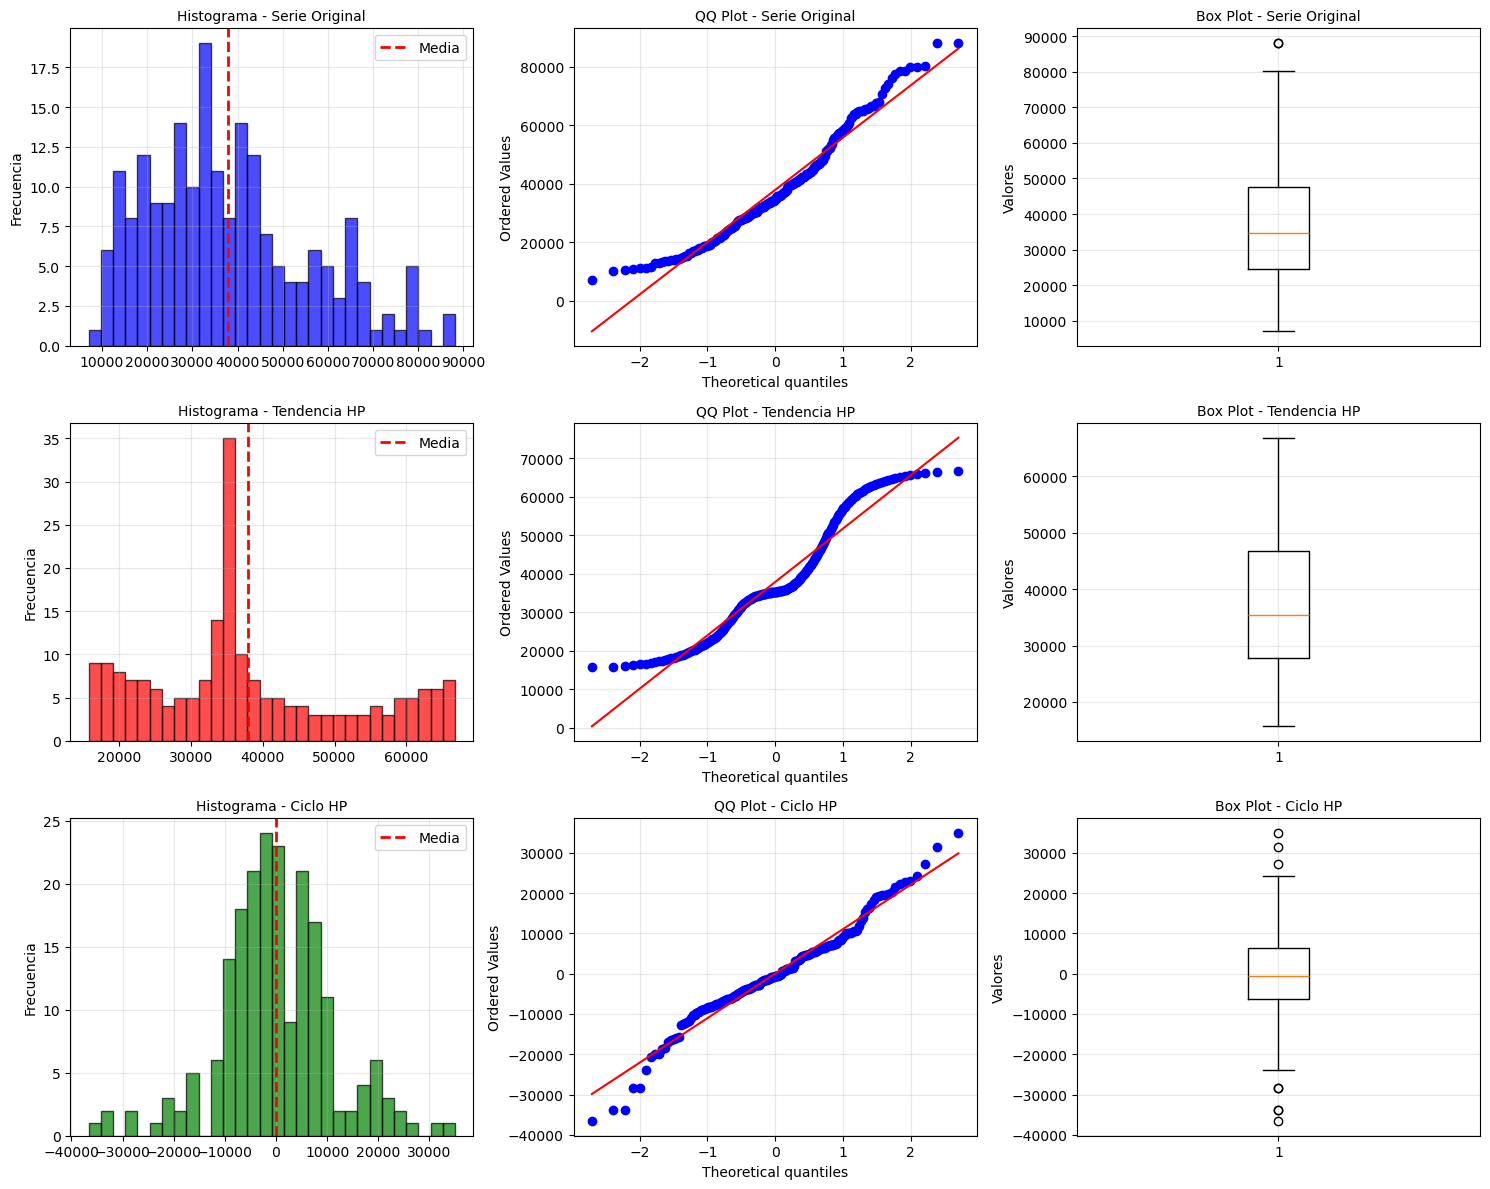

✅ Gráficos de diagnóstico generados

✅ ANÁLISIS HODRICK-PRESCOTT COMPLETADO

📊 Desviaciones Estándar:
   Original:     18061.74
   Tendencia:    14160.23
   Ciclo:        11117.08

Estadísticas:
Std Original: 18061.74
Std Tendencia: 14160.23
Std Ciclo: 11117.08


In [13]:
resultados = hodrick_prescott_completo(df_clean, 'UNIDADES', lamb=14400)

# Ver resultados específicos
print(f"\nEstadísticas:")
print(f"Std Original: {resultados['estadisticas']['std_original']:.2f}")
print(f"Std Tendencia: {resultados['estadisticas']['std_tendencia']:.2f}")
print(f"Std Ciclo: {resultados['estadisticas']['std_ciclo']:.2f}")


===== MÉTRICAS DEL FILTRO HODRICK–PRESCOTT =====
MAE  (Error Absoluto Medio): 8200.63
RMSE (Raíz del Error Cuadrático Medio): 11089.52
MAPE (Error Porcentual Medio Absoluto): 28.23%


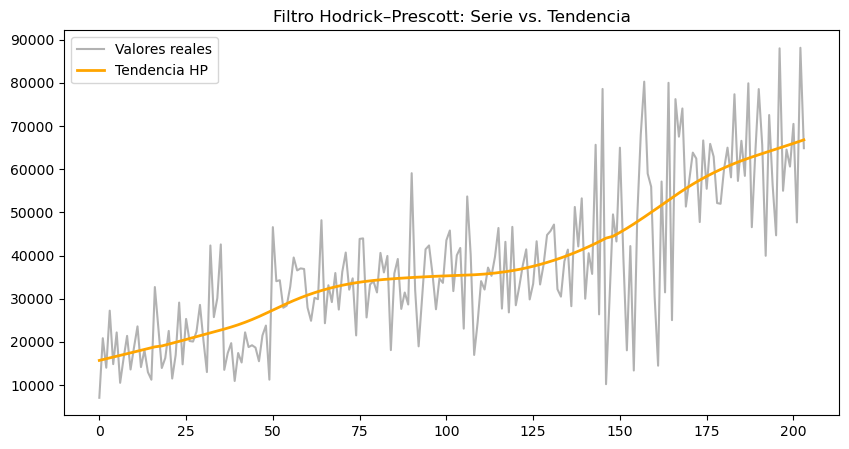

In [14]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- Calcular métricas de desempeño (comparando tendencia vs valores reales) ---
real = df_clean['UNIDADES']
tendencia = resultados['tendencia']

# Eliminar posibles NaN (al inicio o final del filtro)
mask = tendencia.notna()
real = real[mask]
tendencia = tendencia[mask]

# Métricas de error
mae = mean_absolute_error(real, tendencia)
rmse = np.sqrt(mean_squared_error(real, tendencia))

# Evitar división por cero en MAPE
mape = np.mean(np.abs((real - tendencia) / np.where(real == 0, np.nan, real))) * 100

# --- Mostrar resultados ---
print("\n===== MÉTRICAS DEL FILTRO HODRICK–PRESCOTT =====")
print(f"MAE  (Error Absoluto Medio): {mae:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"MAPE (Error Porcentual Medio Absoluto): {mape:.2f}%")

# --- Visualización opcional ---
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(real, label='Valores reales', color='gray', alpha=0.6)
plt.plot(tendencia, label='Tendencia HP', color='orange', linewidth=2)
plt.title('Filtro Hodrick–Prescott: Serie vs. Tendencia')
plt.legend()
plt.show()


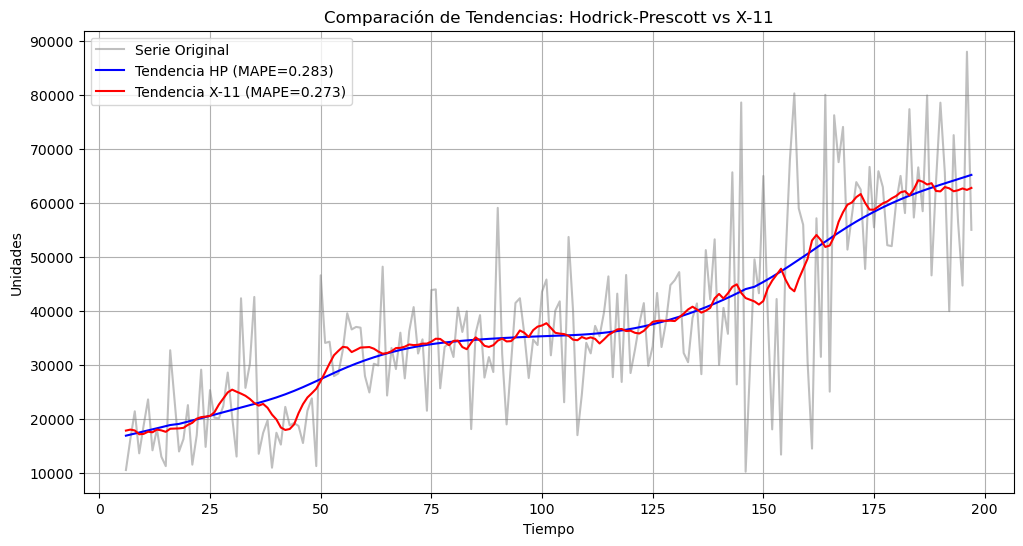

📈 MAPE Hodrick-Prescott: 0.2833
📊 MAPE X-11: 0.2729


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_percentage_error

# ============================================
# 🔹 FUNCIÓN COMPARATIVA HP vs X-11
# ============================================
def comparar_hp_x11(df, columna='UNIDADES', lamb=14400):
    # 1️⃣ Serie limpia sin NaN
    serie = df[columna].dropna()
    
    # 2️⃣ Hodrick–Prescott
    ciclo_hp, tendencia_hp = hpfilter(serie, lamb=lamb)
    
    # 3️⃣ X-11 (asegurar no NaN)
    serie_x11 = serie.dropna()
    decomp_x11 = seasonal_decompose(serie_x11, model='multiplicative', period=12)
    tendencia_x11 = decomp_x11.trend.dropna()
    
    # 4️⃣ Alinear longitudes
    tendencia_hp_aligned = tendencia_hp.loc[tendencia_x11.index]
    serie_aligned = serie.loc[tendencia_x11.index]
    
    # 5️⃣ Calcular MAPE
    mape_hp = mean_absolute_percentage_error(serie_aligned, tendencia_hp_aligned)
    mape_x11 = mean_absolute_percentage_error(serie_aligned, tendencia_x11)
    
    # 6️⃣ Gráfico comparativo
    plt.figure(figsize=(12,6))
    plt.plot(serie_aligned, label='Serie Original', color='gray', alpha=0.5)
    plt.plot(tendencia_hp_aligned, label=f'Tendencia HP (MAPE={mape_hp:.3f})', color='blue')
    plt.plot(tendencia_x11, label=f'Tendencia X-11 (MAPE={mape_x11:.3f})', color='red')
    plt.title('Comparación de Tendencias: Hodrick-Prescott vs X-11')
    plt.xlabel('Tiempo')
    plt.ylabel('Unidades')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 7️⃣ Resultados en consola
    print(f"📈 MAPE Hodrick-Prescott: {mape_hp:.4f}")
    print(f"📊 MAPE X-11: {mape_x11:.4f}")

# ============================================
# 🔹 EJECUCIÓN
# ============================================
comparar_hp_x11(df_clean, 'UNIDADES', lamb=14400)


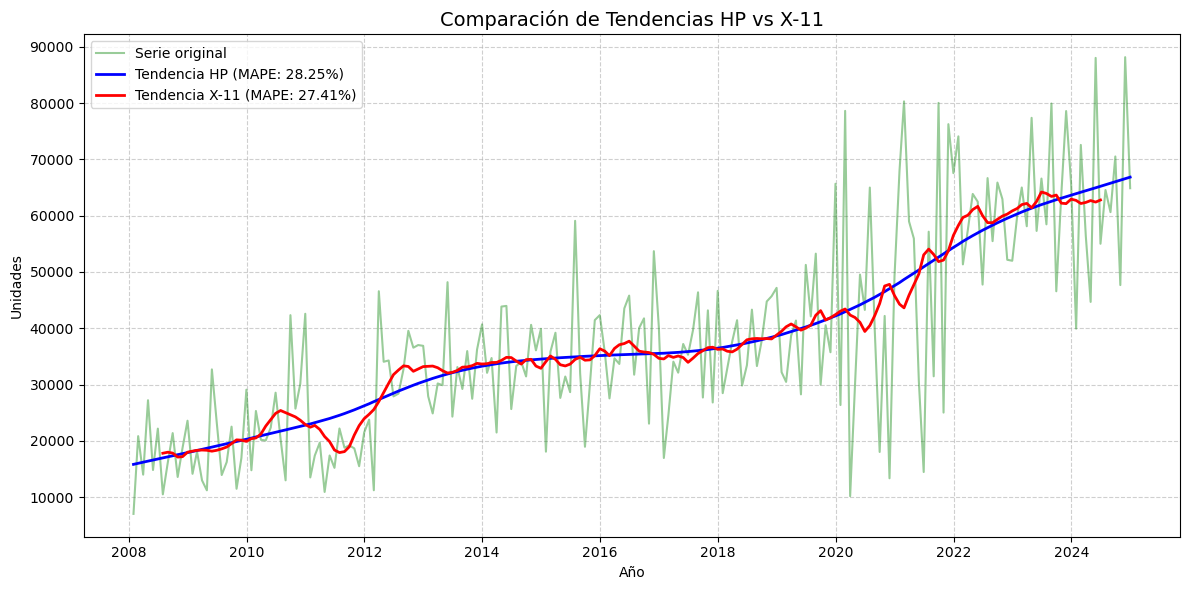

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

# === 1️⃣ Serie temporal base ===
df = df_clean.copy()
df['FECHA'] = pd.to_datetime(df['FECHA'])
df = df.set_index('FECHA')
serie = df['UNIDADES'].asfreq('M').interpolate()  # Asegura frecuencia mensual sin nulos

# === 2️⃣ Hodrick–Prescott ===
ciclo_hp, tendencia_hp = hpfilter(serie, lamb=14400)

# === 3️⃣ X-11 ===
decomp_x11 = seasonal_decompose(serie, model='multiplicative', period=12)
tendencia_x11 = decomp_x11.trend.dropna()

# === 4️⃣ Función MAPE ===
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# === 5️⃣ Calcular MAPE ===
mape_hp = mape(serie.loc[tendencia_hp.index], tendencia_hp)
mape_x11 = mape(serie.loc[tendencia_x11.index], tendencia_x11)

# === 6️⃣ Gráfica combinada ===
plt.figure(figsize=(12, 6))
plt.plot(serie, color='green', alpha=0.4, label='Serie original')
plt.plot(tendencia_hp, color='blue', linewidth=2, label=f'Tendencia HP (MAPE: {mape_hp:.2f}%)')
plt.plot(tendencia_x11, color='red', linewidth=2, label=f'Tendencia X-11 (MAPE: {mape_x11:.2f}%)')

plt.title('Comparación de Tendencias HP vs X-11', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Unidades')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
